<a href="https://colab.research.google.com/github/ale-chen/Arbitrage/blob/main/RegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import warnings
warnings.filterwarnings("ignore")

import os
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 2.11.0


In [87]:
import pandas as pd

X = pd.read_csv('drive/MyDrive/prem_data/train_data_regress/X.csv', header = None)
y = pd.read_csv('drive/MyDrive/prem_data/train_data_regress/y.csv', header = None)

In [88]:
col_names = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'MAXH', 'MAXD', 'MAXA']
print(col_names)
extended_col_names = col_names.copy()
for i in range(5):
  extended_col_names.extend([name + "_H_" + str(i) for name in col_names])
for i in range(5):
  extended_col_names.extend([name + "_A_" + str(i) for name in col_names])

extended_col_names = [ele for ele in extended_col_names if ele not in ['MAXH','MAXD','MAXA']]

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'MAXH', 'MAXD', 'MAXA']


In [89]:
X.columns = extended_col_names

#WE DON'T WANT TO TRAIN ON GAME STATS, ONLY PREVIOUS

X.drop(['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG','HTR', 'HS', 'AS', 'HST',
        'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY','HR', 'AR'], axis = 1)


#X = X.drop(X.iloc[:, 21:261],axis = 1)

X

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,733305,5,4,2.0,0.0,-1,0.0,0.0,0,17.0,...,11.0,11.0,9.0,16.0,8.0,7.0,2.0,3.0,0.0,0.0
1,733305,6,11,3.0,1.0,-1,2.0,0.0,-1,12.0,...,6.0,8.0,8.0,21.0,2.0,6.0,1.0,2.0,0.0,0.0
2,733305,1,0,1.0,3.0,1,1.0,2.0,1,12.0,...,8.0,9.0,12.0,10.0,7.0,17.0,2.0,2.0,0.0,0.0
3,733305,10,12,0.0,0.0,0,0.0,0.0,0,27.0,...,11.0,2.0,8.0,10.0,20.0,3.0,1.0,1.0,0.0,0.0
4,733306,3,2,2.0,2.0,0,1.0,0.0,-1,9.0,...,5.0,8.0,11.0,12.0,4.0,6.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,738555,9,29,2.0,1.0,-1,1.0,0.0,-1,14.0,...,5.0,3.0,9.0,9.0,5.0,5.0,1.0,2.0,1.0,0.0
5405,738555,20,10,3.0,0.0,-1,2.0,0.0,-1,12.0,...,6.0,4.0,9.0,7.0,2.0,7.0,1.0,1.0,0.0,0.0
5406,738556,13,17,1.0,0.0,-1,1.0,0.0,-1,12.0,...,3.0,5.0,19.0,14.0,4.0,6.0,2.0,3.0,1.0,0.0
5407,738556,39,37,1.0,0.0,-1,1.0,0.0,-1,6.0,...,2.0,4.0,15.0,14.0,0.0,2.0,4.0,2.0,0.0,0.0


In [90]:
#Y is read in horizontally, so transpose
y = y.transpose()

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = .2)

#trying unscaled data, remove later
"""
X_tr_scaled = X_tr
X_te_scaled = X_te
"""

scaler = StandardScaler()
scalery = StandardScaler()

X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled = scaler.transform(X_te)

y_tr_scaled = scalery.fit_transform(y_tr)
y_te_scaled = scalery.transform(y_te)

"""
scaler = MinMaxScaler()

X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled = scaler.transform(X_te)
"""

'\nscaler = MinMaxScaler()\n\nX_tr_scaled = scaler.fit_transform(X_tr)\nX_te_scaled = scaler.transform(X_te)\n'

In [80]:
print(X_tr_scaled.shape)
print(X_te_scaled.shape)

(4327, 261)
(1082, 261)


In [92]:
import keras
from keras.models import Sequential
from keras.layers import Dense

"""
BUILDING NEURAL NETWORK:

Sizing loosely based on:
http://www.faqs.org/faqs/ai-faq/neural-nets/part1/preamble.html

Jeff Heaton: "The optimal size of the hidden layer is usually between the size
of the input and size of the output layers"

For the future: iterate through different sizing, pruning parameters etc
"""
# Three Hidden Layers of 261, 256, 128, 64, 4 dimension

model = Sequential()
model.add(Dense(256, input_shape=(261,), kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(128, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(64, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))

"""
model = Sequential()
model.add(Dense(32, input_dim = 21, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(16, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(8, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(4, kernel_initializer='normal', activation = 'linear'))
"""

In [93]:
#%pip install tensorflow-addons
import tensorflow_addons as tfa
"""
DEFINE LOSS AND OPTIMIZER:

Adam is an extended version of stochastic gradient descent.
https://optimization.cbe.cornell.edu/index.php?title=Adam

MAE is a pretty standard error function for this.
"""

model.compile(loss='mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001), metrics = ['mse'])

In [94]:
history = model.fit(X_tr_scaled, y_tr_scaled, validation_data = (X_te_scaled,y_te_scaled), epochs=30, batch_size=500)

Epoch 1/30
9/9 [==============================] - 1s 22ms/step - loss: 0.7718 - mse: 1.0000 - val_loss: 0.7702 - val_mse: 0.9925
Epoch 2/30
9/9 [==============================] - 0s 6ms/step - loss: 0.7713 - mse: 1.0000 - val_loss: 0.7701 - val_mse: 0.9931
Epoch 3/30
9/9 [==============================] - 0s 6ms/step - loss: 0.7708 - mse: 0.9999 - val_loss: 0.7700 - val_mse: 0.9935
Epoch 4/30
9/9 [==============================] - 0s 5ms/step - loss: 0.7702 - mse: 0.9993 - val_loss: 0.7695 - val_mse: 0.9931
Epoch 5/30
9/9 [==============================] - 0s 10ms/step - loss: 0.7689 - mse: 0.9973 - val_loss: 0.7681 - val_mse: 0.9908
Epoch 6/30
9/9 [==============================] - 0s 9ms/step - loss: 0.7663 - mse: 0.9923 - val_loss: 0.7652 - val_mse: 0.9851
Epoch 7/30
9/9 [==============================] - 0s 5ms/step - loss: 0.7615 - mse: 0.9835 - val_loss: 0.7600 - val_mse: 0.9747
Epoch 8/30
9/9 [==============================] - 0s 7ms/step - loss: 0.7530 - mse: 0.9662 - val_loss:

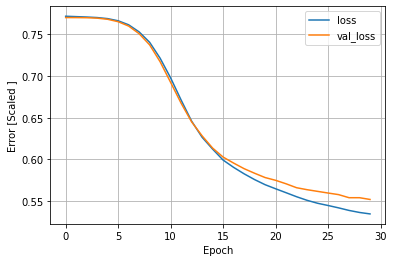

In [95]:
import numpy as np

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

def plot_loss(history):
  #loss = scalery.inverse_transform(np.reshape(history.history['loss'], (-1,1)))
  #val_loss = scalery.inverse_transform(np.reshape(history.history['val_loss'], (-1,1)))

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Scaled ]')
  plt.legend()
  plt.grid(True)

plot_loss(history)